In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def diode_func(x, va, r):    
    y = (x - va) / r
    y[y<0] = 0
    return y

def linear_func(x, a, b):
    return a*x + b



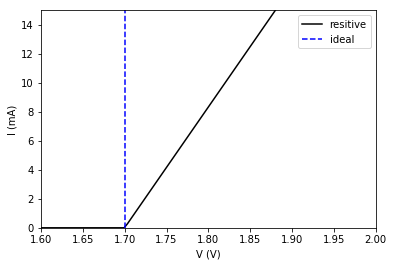

In [3]:
va = 1.7
r  = 0.012
xv = np.linspace(0,2.0,500)
yf = diode_func(xv, va, r)
plot(xv,yf,"k-",label="resitive")
plot([va,va],[0,15],"b--",label="ideal")
plt.xlim(1.6,2.0)
plt.ylim(0,15.0)
plt.xlabel("V (V)")
plt.ylabel("I (mA)")
plt.legend()
plt.savefig("model.pdf")

In [4]:
from scipy import optimize

# data for each diode:
dat_i   = []
dat_v   = []
dat_lmb = np.array([])

# fitted results:
fit_olmb = np.array([])
fit_va   = np.array([])
fit_dva  = np.array([])
fit_r    = np.array([])
fit_dr   = np.array([])

def unpack_raw(raw, lmb):
    global dat_lmb, dat_i, data_v;
    dat = np.array(raw)
    i = dat[::2]
    v = dat[1::2]
    dat_lmb = np.append(dat_lmb, lmb)
    dat_i.append(i)
    dat_v.append(v)

def perform_fit(index):        
    global dat_lmb, dat_i, dat_v;
    global fit_olmb, fit_va, fit_dva, fit_r, fit_dr;

    fit_olmb = np.append(fit_olmb, 1000.0/dat_lmb[index])
    v  = dat_v[index]
    i  = dat_i[index]
    sigma = np.full(size(i), 0.02) 
    print(sigma)
    guess_va = 1.5   # 1.5 volts
    guess_r  = 0.010 # 10 Ohms
    keep = (i > 2)
    #keep = (i > 0)
    par, cov = optimize.curve_fit(linear_func, i[keep], v[keep], sigma=sigma[keep],absolute_sigma=True, p0=[guess_r, guess_va])
    va  = par[1]
    r   = par[0]    
    unc = sqrt(diag(cov))
    dva = unc[1]
    dr  = unc[0]     
    print("best fit va:  ", va, " +/- ", dva)
    print("best fit r:   ", r, " +/- ", dr)
    fit_va  = np.append(fit_va, va)
    fit_dva = np.append(fit_dva, dva)
    fit_r   = np.append(fit_r, r)
    fit_dr  = np.append(fit_dr, dr)    


[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
best fit va:   1.699904990751508  +/-  0.02685060284131954
best fit r:    0.015983904323008884  +/-  0.003159107355969442
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
best fit va:   1.8006033304319462  +/-  0.018720090064309095
best fit r:    0.027580515899936677  +/-  0.002390015505856084
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
best fit va:   1.873622953096933  +/-  0.018720048156222836
best fit r:    0.0196270682800569  +/-  0.002395106037878164
[620. 587. 565. 620. 587. 565.]
[1.7   1.801 1.874 1.7   1.801 1.874]
[0.027 0.019 0.019 0.027 0.019 0.019]
mfit 1.1060170010845949  +/- 0.14620273261410996


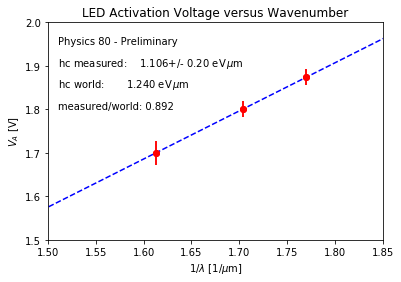

In [10]:
raw_red_1 = [
    0.44, 1.62,
    0.95, 1.66,
    1.99, 1.71,
    4.15, 1.77,
    6.05, 1.81,
    8.09, 1.85,
    10.04, 1.88,
    12.02, 1.91    
]    

raw_yellow_1 = [
    0.51, 1.74,
    1.16, 1.80,
    2.08, 1.86,
    3.96, 1.94,
    6.10, 2.02,
    8.10, 2.08,
    10.07, 2.13,
    12.11, 2.18,
]    

raw_green_1 = [
    0.50, 1.83,
    0.99, 1.86,
    2.03, 1.91,
    2.03, 1.91,
    4.13, 1.96,
    6.16, 1.99,
    8.09, 2.03,
    9.99, 2.05,
    12.07, 2.08,
]

unpack_raw(raw_red_1, 620)
unpack_raw(raw_yellow_1, 587)
unpack_raw(raw_green_1, 565)

perform_fit(0)
perform_fit(1)
perform_fit(2)

print(dat_lmb)
print(fit_va)
print(fit_dva)

plt.errorbar(fit_olmb,fit_va,yerr=fit_dva,fmt="ro")
guess_m = 1.0   # 1.5 volts
guess_b = 0.0 # 10 Ohms
par, cov = optimize.curve_fit(linear_func, fit_olmb, fit_va, sigma=fit_dva,
                              absolute_sigma=True, 
                              p0=[guess_m, guess_b])
mfit = par[0]
bfit = par[1]
munc = sqrt(diag(cov))[0]

print("mfit", mfit, " +/-", munc)
xv = np.linspace(0,2.0,100)
yf = linear_func(xv, mfit, bfit)
plt.plot(xv,yf,"b--",label="linear fit")

plt.xlim(1.5,1.85)
plt.ylim(1.5,2.0)
plt.xlabel("1/$\lambda$ [1/$\mu$m]")
plt.ylabel("$V_A$ [V]")
plt.title("LED Activation Voltage versus Wavenumber")

hc = 1.23984193
mfitr = np.around(mfit,decimals=3)
hcr = np.around(hc,decimals=4)

plt.text(1.51, 1.95, "Physics 80 - Preliminary")
np.set_printoptions(precision=3)
plt.text(1.51, 1.90, "hc measured:    "+str(format(mfit, '.3f'))+"+/- 0.20 eV$\,\mu$m")
plt.text(1.51, 1.85, "hc world:       "+str(format(hc, '.3f'))+" eV$\,\mu$m")
plt.text(1.51, 1.80, "measured/world: "+str(format(mfit/hc, '.3f')))
plt.savefig("planck.pdf")

[0.02 0.02 0.02 0.02 0.02]


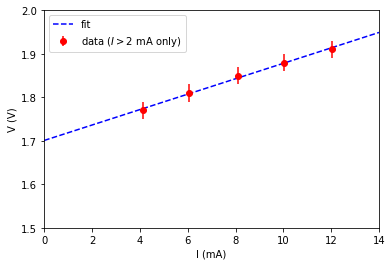

In [6]:
keep = (dat_i[0]>2.0)
sigma = np.full(np.sum(keep), 0.02) 
print(sigma)
plt.errorbar(dat_i[0][keep], dat_v[0][keep],yerr=sigma,fmt="ro",label="data ($I>2$ mA only)")

xf = np.linspace(0.0,14.0,100)
yf = linear_func(xf,fit_r[0],fit_va[0])
plt.plot(xf,yf,"b--",label="fit")
plt.xlim(0,14.0)
plt.ylim(1.5,2.0)
plt.ylabel("V (V)")
plt.xlabel("I (mA)")
plt.legend()
plt.savefig("fit_vi.pdf")

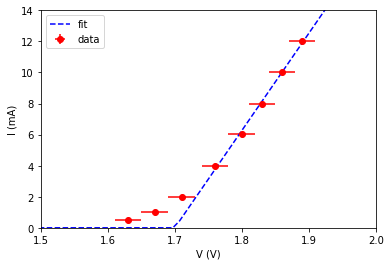

In [12]:
plt.errorbar(dat_v[0], dat_i[0],xerr=0.02,yerr=0.02,fmt="ro",label="data")
xf = np.linspace(1.0,2.0,100)
yf = diode_func(xf,fit_va[0],fit_r[0])
plt.plot(xf,yf,"b--",label="fit")
plt.xlim(1.5,2.0)
plt.ylim(0,14.0)
plt.xlabel("V (V)")
plt.ylabel("I (mA)")
plt.legend()
plt.savefig("fit_diode.pdf")

[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
best fit va:   1.699904990751508  +/-  0.02685060284131954
best fit r:    0.015983904323008884  +/-  0.003159107355969442
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
best fit va:   1.8006033304319462  +/-  0.018720090064309095
best fit r:    0.027580515899936677  +/-  0.002390015505856084
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
best fit va:   1.873622953096933  +/-  0.018720048156222836
best fit r:    0.0196270682800569  +/-  0.002395106037878164
[620. 587. 565.]
[1.7   1.801 1.874]
[0.027 0.019 0.019]
mfit 1.106016997571879  +/- 0.20676181851600856


Text(1.51,1.8,'measured/world: 0.892')

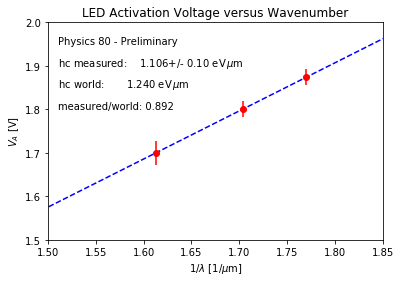

In [8]:

# data for each diode:
dat_i   = []
dat_v   = []
dat_lmb = np.array([])

# fitted results:
fit_olmb = np.array([])
fit_va   = np.array([])
fit_dva  = np.array([])
fit_r    = np.array([])
fit_dr   = np.array([])

raw_red_2 = [
    0.53, 1.63,
    1.00, 1.67,
    1.99, 1.71,
    4.01, 1.76,
    6.02, 1.80,
    8.00, 1.83,
    10.02, 1.86,
    12.02, 1.89,    
]

raw_yellow_2 = [
    0.51, 1.74,
    1.01, 1.80,
    2.08, 1.88,
    4.02, 1.98,
    6.03, 2.07,
    8.00, 2.13,
    10.00, 2.19,
    12.02, 2.25,
]    

raw_yellow_2 = [
    0.51, 1.74,
    1.05, 1.78,
    2.01, 1.84,
    4.08, 1.92,
    6.07, 1.98,
    8.07, 2.03,
    10.00, 2.08,
    12.06, 2.12,
]    




raw_green_2 = [
    0.48, 1.82,
    1.05, 1.86,
    2.02, 1.90,
    4.01, 1.96,
    6.08, 2.00,
    8.09, 2.04,
    10.01, 2.07,
    11.99, 2.10,   
]

unpack_raw(raw_red_2, 620)
unpack_raw(raw_yellow_2, 587)
unpack_raw(raw_green_2, 565)

perform_fit(0)
perform_fit(1)
perform_fit(2)

print(dat_lmb)
print(fit_va)
print(fit_dva)

plt.errorbar(fit_olmb,fit_va,yerr=fit_dva,fmt="ro")
guess_m = 1.0   # 1.5 volts
guess_b = 0.0 # 10 Ohms
par, cov = optimize.curve_fit(linear_func, fit_olmb, fit_va, sigma=fit_dva,
                              absolute_sigma=True, 
                              p0=[guess_m, guess_b])
mfit = par[0]
bfit = par[1]
munc = sqrt(diag(cov))[0]

print("mfit", mfit, " +/-", munc)
xv = np.linspace(0,2.0,100)
yf = linear_func(xv, mfit, bfit)
plt.plot(xv,yf,"b--",label="linear fit")

plt.xlim(1.5,1.85)
plt.ylim(1.5,2.0)
plt.xlabel("1/$\lambda$ [1/$\mu$m]")
plt.ylabel("$V_A$ [V]")
plt.title("LED Activation Voltage versus Wavenumber")

hc = 1.23984193
mfitr = np.around(mfit,decimals=3)
hcr = np.around(hc,decimals=4)

plt.text(1.51, 1.95, "Physics 80 - Preliminary")
np.set_printoptions(precision=3)
plt.text(1.51, 1.90, "hc measured:    "+str(format(mfit, '.3f'))+"+/- 0.20 eV$\,\mu$m")
plt.text(1.51, 1.85, "hc world:       "+str(format(hc, '.3f'))+" eV$\,\mu$m")
plt.text(1.51, 1.80, "measured/world: "+str(format(mfit/hc, '.3f')))

In [9]:
raw_red_0 = [
    0.44, 1.62,
    0.95, 1.66,
    1.99, 1.71,
    4.15, 1.77,
    6.05, 1.81,
    8.09, 1.85,
    10.04, 1.88,
    12.02, 1.91    
]    

raw_red_1 = [
    0.53, 1.63,
    1.00, 1.67,
    1.99, 1.71,
    4.01, 1.76,
    6.02, 1.80,
    8.00, 1.83,
    10.02, 1.86,
    12.02, 1.89,    
]    
raw_red_2 = [
    0.50, 1.62,
    1.00, 1.66,
    2.00, 1.71,
    4.00, 1.77,
    6.03, 1.81,
    8.03, 1.85,
    10.02, 1.89,
    12.00, 1.92,
]    
raw_red_3 = [
    0.54, 1.64,
    1.02, 1.68,
    2.01, 1.72,
    4.01, 1.77,
    6.03, 1.82,
    8.02, 1.86,
    10.02, 1.89,
    12.00, 1.93,
]    

raw_red_4 = [
    0.52, 1.64,
    1.09, 1.68,
    2.01, 1.72,
    4.05, 1.77,
    6.04, 1.81,
    8.02, 1.85,
    10.07, 1.88,
    12.03, 1.92,
]    